In [24]:
from pathlib import Path
import os
from tqdm import tqdm
import cv2    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data upload

In [25]:
train_path = 'trafficnet_dataset_v1/train'
test_path = 'trafficnet_dataset_v1/test'

In [26]:
class_names = ['accident', 'dense_traffic', 'fire', 'sparse_traffic']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

no_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [27]:
def load_data(dataset):
    images = []
    labels = []

    if os.path.exists(dataset) and os.path.isdir(dataset): 
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            # itteration through immages in folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                if isinstance(image, np.ndarray):
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, IMAGE_SIZE) 
                        
                    #append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
            print(len(images))
        images = np.array(images, dtype = 'int32')
        labels = np.array(labels, dtype = 'int32')
        return (images, labels)
    else: return print("Folder does not exist")



In [28]:
(training_img, training_labels) = load_data(train_path)
(test_img, test_labels) = load_data(test_path)

  0%|          | 0/900 [00:00<?, ?it/s]

100%|██████████| 900/900 [00:01<00:00, 725.14it/s]


900


100%|██████████| 900/900 [00:01<00:00, 732.35it/s]


1800


100%|██████████| 900/900 [00:01<00:00, 796.09it/s]


2700


100%|██████████| 901/901 [00:01<00:00, 760.32it/s]


3600


100%|██████████| 200/200 [00:00<00:00, 673.77it/s]


200


100%|██████████| 200/200 [00:00<00:00, 673.48it/s]


400


100%|██████████| 200/200 [00:00<00:00, 760.55it/s]


600


100%|██████████| 200/200 [00:00<00:00, 764.19it/s]


800


In [29]:
training_img[0]

array([[[179, 183, 206],
        [227, 210, 223],
        [150, 106, 101],
        ...,
        [ 86,  79,  87],
        [103,  97, 105],
        [154, 151, 156]],

       [[116, 121, 141],
        [233, 221, 230],
        [191, 154, 148],
        ...,
        [ 63,  56,  64],
        [ 86,  81,  87],
        [120, 117, 122]],

       [[ 94, 101, 113],
        [189, 183, 187],
        [216, 188, 182],
        ...,
        [ 52,  45,  53],
        [ 68,  62,  69],
        [ 70,  67,  72]],

       ...,

       [[ 24,  20,  16],
        [ 26,  22,  19],
        [ 28,  26,  24],
        ...,
        [124, 114, 113],
        [123, 113, 112],
        [106,  96,  95]],

       [[ 26,  20,  17],
        [ 28,  23,  20],
        [ 30,  26,  25],
        ...,
        [124, 114, 113],
        [122, 112, 110],
        [ 88,  78,  77]],

       [[ 28,  20,  18],
        [ 28,  23,  20],
        [ 31,  27,  26],
        ...,
        [124, 114, 113],
        [123, 113, 112],
        [ 74,  64,  63]]

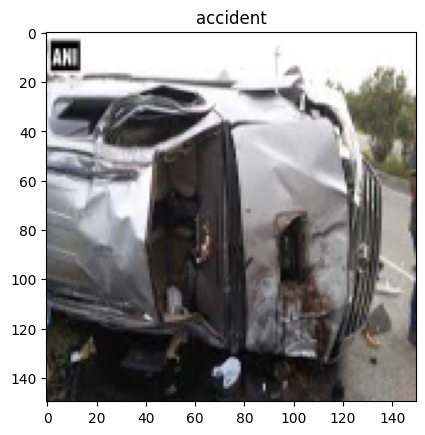

In [134]:
index = np.random.randint(training_img.shape[0])
plt.figure()
plt.imshow(training_img[index])
plt.title(class_names[training_labels[index]])
plt.show()

## Model training

In [32]:
from sklearn.utils import shuffle

training_img, training_labels = shuffle(training_img, training_labels, random_state=21)

In [33]:
training_img = training_img / 255.0 
test_img = test_img / 255.0

In [34]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                            tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dropout(0.5), 
                            tf.keras.layers.Dense(4, activation='softmax')])

In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
network = model.fit(training_img, training_labels, epochs=10, validation_split=0.1, batch_size=64)

Epoch 1/10
51/51 [==============================] - 50s 960ms/step - loss: 3.0129 - accuracy: 0.3867 - val_loss: 7.9541 - val_accuracy: 0.3417
Epoch 2/10
51/51 [==============================] - 47s 920ms/step - loss: 1.2791 - accuracy: 0.4312 - val_loss: 10.7736 - val_accuracy: 0.3361
Epoch 3/10
51/51 [==============================] - 47s 915ms/step - loss: 1.1867 - accuracy: 0.4898 - val_loss: 24.9964 - val_accuracy: 0.2861
Epoch 4/10
51/51 [==============================] - 47s 912ms/step - loss: 1.0748 - accuracy: 0.5210 - val_loss: 25.2568 - val_accuracy: 0.3556
Epoch 5/10
51/51 [==============================] - 47s 918ms/step - loss: 1.0009 - accuracy: 0.5395 - val_loss: 17.4468 - val_accuracy: 0.4111
Epoch 6/10
51/51 [==============================] - 49s 958ms/step - loss: 1.0092 - accuracy: 0.5472 - val_loss: 6.5829 - val_accuracy: 0.5583
Epoch 7/10
51/51 [==============================] - 49s 958ms/step - loss: 0.9476 - accuracy: 0.5611 - val_loss: 21.8743 - val_accuracy: 0

In [37]:
test_predct = model.evaluate(test_img, test_labels)

25/25 [==============================] - 2s 92ms/step - loss: 2.7734 - accuracy: 0.6150


In [38]:
predictions = model.predict(test_img)

25/25 [==============================] - 3s 100ms/step


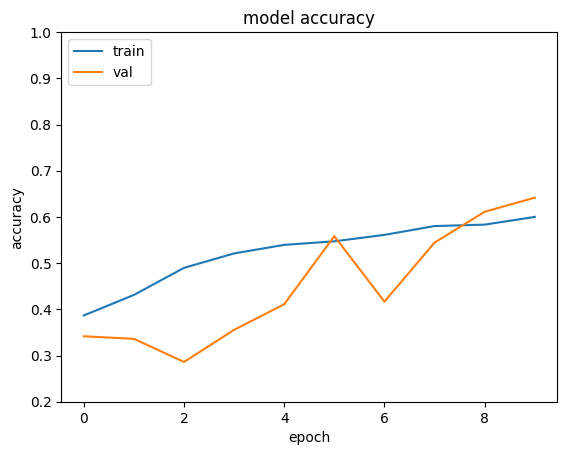

In [143]:
plt.plot(network.history['accuracy'])
plt.plot(network.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.2, 1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

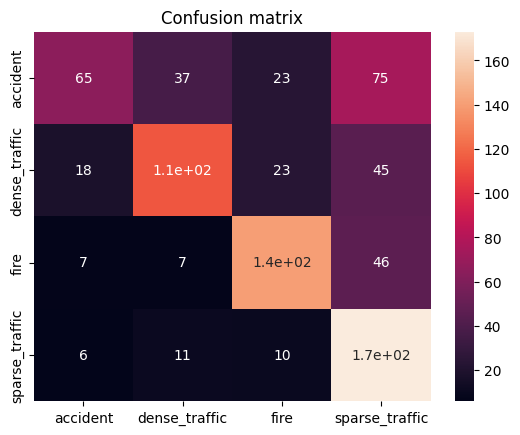

In [49]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_labels, np.argmax(predictions, axis = 1))
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()


## HOG and SVC

In [55]:
from skimage.feature import hog
from skimage.color import rgb2gray

train_features = []
test_features = []
for img in training_img:
    gray = rgb2gray(img)
    fd = hog(gray, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=False)
    train_features.append(fd)
for img in test_img:    
    gray = rgb2gray(img)
    fd = hog(gray, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=False)
    test_features.append(fd)


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(train_features, training_labels)

# Predict the labels for the test set
y_pred = svm_classifier.predict(test_features)

In [59]:
accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.88%


In [65]:
#len(train_features)
len(train_features[0])

10952

## VGG16 and PCA

In [69]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [70]:
train_feat_vg = model.predict(training_img)
test_feat_vg = model.predict(test_img)

25/25 [==============================] - 29s 1s/step


In [72]:
n_train, x, y, z = train_feat_vg.shape
numFeatures = x * y * z

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = train_feat_vg.reshape((n_train, numFeatures))
pca.fit(X)

PCA(n_components=2)

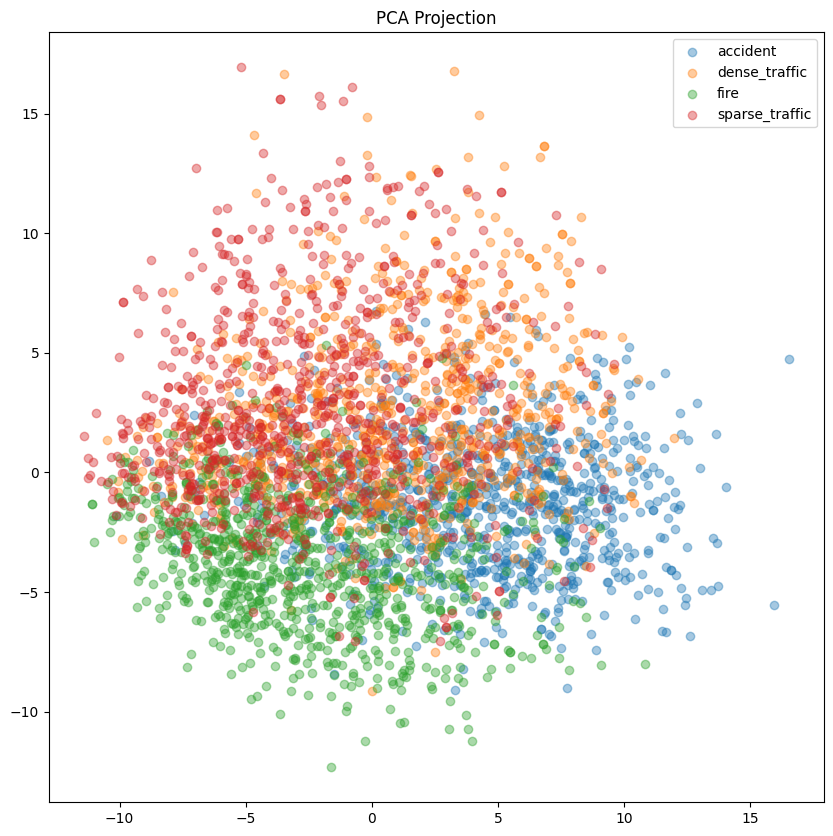

In [75]:
C = pca.transform(X)
C1 = C[:, 0]
C2 = C[:, 1]

plt.subplots(figsize=(10,10))
for i, class_name in enumerate(class_names):
    plt.scatter(C1[training_labels == i][:1000], C2[training_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

### Learning after VGG16

In [76]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_feat_vg, training_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
23/23 [==============================] - 1s 21ms/step - loss: 0.7822 - accuracy: 0.6972 - val_loss: 0.5211 - val_accuracy: 0.8056
Epoch 2/10
23/23 [==============================] - 0s 9ms/step - loss: 0.3662 - accuracy: 0.8712 - val_loss: 0.4541 - val_accuracy: 0.8306
Epoch 3/10
23/23 [==============================] - 0s 9ms/step - loss: 0.2686 - accuracy: 0.9062 - val_loss: 0.4240 - val_accuracy: 0.8542
Epoch 4/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1991 - accuracy: 0.9375 - val_loss: 0.4178 - val_accuracy: 0.8458
Epoch 5/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1592 - accuracy: 0.9538 - val_loss: 0.4304 - val_accuracy: 0.8389
Epoch 6/10
23/23 [==============================] - 0s 9ms/step - loss: 0.1213 - accuracy: 0.9701 - val_loss: 0.4137 - val_accuracy: 0.8528
Epoch 7/10
23/23 [==============================] - 0s 9ms/step - loss: 0.0978 - accuracy: 0.9809 - val_loss: 0.4251 - val_accuracy: 0.8528
Epoch 8/10
23/23 [=

In [77]:
test_2 = model2.evaluate(test_feat_vg, test_labels)

25/25 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8587


In [85]:
predict_vgg = model2.predict(test_feat_vg)

25/25 [==============================] - 0s 2ms/step


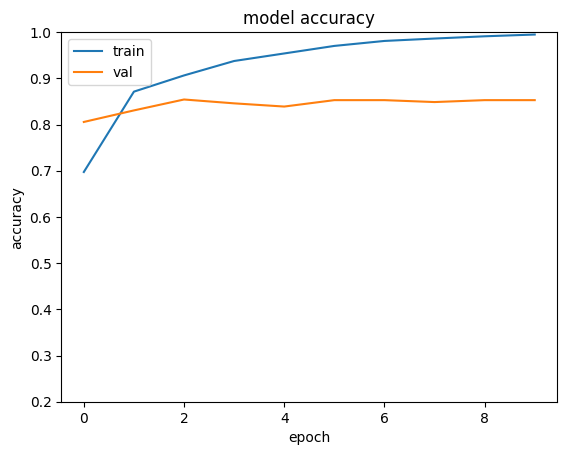

In [144]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.2, 1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Result analysis

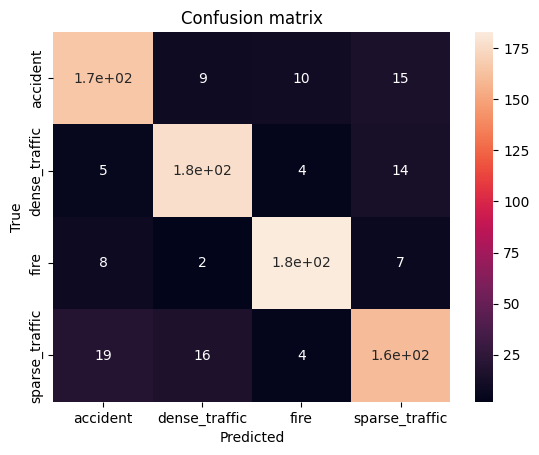

In [157]:
CM = confusion_matrix(test_labels, np.argmax(predict_vgg, axis = 1))
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

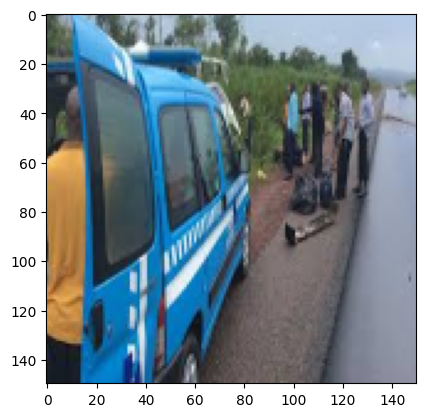

Actual label: sparse_traffic
Predicted labels: 
accident: 53.02%
sparse_traffic: 43.93%
dense_traffic: 2.78%
fire: 0.27%


In [202]:
index = np.random.randint(test_img.shape[0])
plt.figure()
plt.imshow(test_img[index])
plt.show()
print(f'Actual label: {class_names[test_labels[index]]}')
print('Predicted labels: ')
for i in np.argsort(predict_vgg[index])[::-1][:4]:
    print(f'{class_names[i]}: {predict_vgg[index][i] * 100:.2f}%')

In [113]:
top_pred_vgg = np.argmax(predict_vgg, axis = 1)
accuracy = accuracy_score(test_labels, top_pred_vgg)


In [155]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,2, 3]:
    prec,recall,f_score,support = precision_recall_fscore_support(np.array(test_labels)==l,
                                                      np.array(top_pred_vgg)==l,
                                                      pos_label=True,average=None)
    res.append([class_names[l],recall[1],recall[0], f_score[1], support[1]])

In [156]:
import pandas as pd
pd.DataFrame(res,columns = ['class','sensitivity','specificity', 'f_score', 'support'])

,class,sensitivity,specificity,f_score,support
0,accident,0.830,0.946667,0.834171,200
1,dense_traffic,0.885,0.955000,0.876238,200
2,fire,0.915,0.970000,0.912718,200
3,sparse_traffic,0.805,0.940000,0.811083,200


In [117]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, top_pred_vgg, target_names=class_names))

                precision    recall  f1-score   support

      accident       0.84      0.83      0.83       200
 dense_traffic       0.87      0.89      0.88       200
          fire       0.91      0.92      0.91       200
sparse_traffic       0.82      0.81      0.81       200

      accuracy                           0.86       800
     macro avg       0.86      0.86      0.86       800
  weighted avg       0.86      0.86      0.86       800



In [133]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, predict_vgg, multi_class='ovr')

0.9709291666666666